<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week4_Ensemble_Learning_RandomForest_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning & Random Forest
INFO 371: Data Mining Applications – Week 4

**Instructor:** Charles Dorner, EdD (Candidate)

This notebook accompanies the lecture slides on ensemble learning techniques, including **Bagging**, **Random Forest**, **Boosting**, and **Stacking**. It demonstrates each concept with practical Python examples using *scikit‑learn*.

## 1. What is Ensemble Learning?
Ensemble learning combines the predictions of **multiple base models** ("weak learners") to create a final model that is often **more accurate and robust** than any individual learner.

*Advantages*
- Improves predictive performance (reduces variance and/or bias)
- Provides robustness against overfitting
- Can yield useful by‑products (e.g., feature importances)

*Disadvantages*
- Harder to interpret
- Increased computational cost

## 2. Bagging (Bootstrap Aggregating)
**Idea:** Train many models on different *bootstrapped* samples of the training data, then **average** (regression) or **vote** (classification) their predictions.

Bagging reduces the **variance** component of error, particularly for *unstable* learners like decision trees.

In [ ]:
# Bagging with Decision Trees
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimator (weak learner)
base_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

# Bagging ensemble
bagging_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# Fit and evaluate
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Bagging accuracy: {acc:.3f}")

Bagging accuracy: 0.883


## 3. Random Forest (Bag of Decision Trees)
A **Random Forest** adds an extra layer of randomness to bagging: **each split** in each tree considers only a *random subset* of the features.

This decorrelates the individual trees, often yielding even greater performance and stability.

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # random subset size = sqrt(total_features)
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest accuracy: {rf_acc:.3f}")

# Feature importance example
import pandas as pd
feature_importance = pd.Series(rf_clf.feature_importances_).sort_values(ascending=False)
print("Top 5 important features:\n", feature_importance.head())

Random Forest accuracy: 0.890
Top 5 important features:
 12    0.133959
2     0.067871
5     0.067730
6     0.062182
17    0.060467
dtype: float64


## 4. Boosting
Boosting trains learners **sequentially**, each trying to correct its predecessor’s errors. Models are combined with **performance‑based weights**.

Popular algorithms include **AdaBoost** (adaptive boosting) and **Gradient Boosting**.

In [ ]:
# AdaBoost and Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
grad_clf = GradientBoostingClassifier(random_state=42)

for name, model in [('AdaBoost', ada_clf), ('GradientBoosting', grad_clf)]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} accuracy: {accuracy_score(y_test, pred):.3f}")

AdaBoost accuracy: 0.797
GradientBoosting accuracy: 0.887


## 5. Stacking
Stacking (or *stacked generalization*) combines **heterogeneous** base learners by training a second‑level *meta‑learner* on their outputs.
Cross‑validation is used to generate out‑of‑fold predictions for training the meta‑learner, mitigating overfitting.

In [ ]:
# Stacking Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

level0_estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_learner = LogisticRegression(max_iter=1000)

stack_clf = StackingClassifier(
    estimators=level0_estimators,
    final_estimator=meta_learner,
    passthrough=False,
    n_jobs=-1
)

stack_clf.fit(X_train, y_train)
stack_pred = stack_clf.predict(X_test)
print(f"Stacking accuracy: {accuracy_score(y_test, stack_pred):.3f}")

Stacking accuracy: 0.933


## 6. Simplified Tree

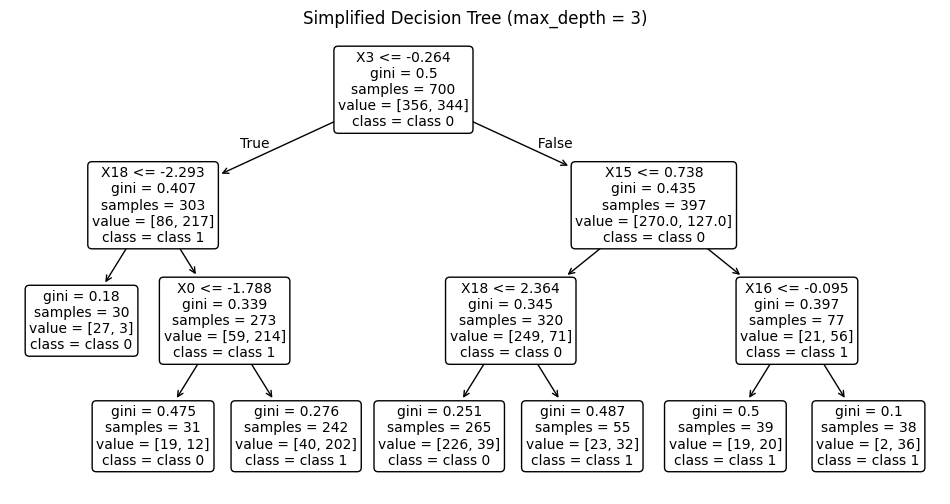

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Simpler tree: shallow depth, more readable
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build a shallow tree for clarity
simple_tree = DecisionTreeClassifier(
    max_depth=3,          # limit depth to 3 levels
    min_samples_leaf=30,  # avoid tiny leaves
    random_state=42
)
simple_tree.fit(X_train, y_train)

# Visualize the simple tree
plt.figure(figsize=(12, 6))
plot_tree(
    simple_tree,
    feature_names=[f"X{i}" for i in range(X.shape[1])],
    class_names=["class 0", "class 1"],
    filled=False,  # comply: no explicit colors
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree (max_depth = 3)")
plt.show()


## 7. Retrieval Practice
Test your understanding:
1. **Bagging vs. Boosting** – Which error component (bias/variance) does each primarily target?
2. Why does Random Forest select a random subset of features at each split?
3. How does AdaBoost adjust instance weights during training?
4. Describe one benefit and one drawback of stacking.
5. When might you prefer a single decision tree over a Random Forest?

### 8. References
- Slide deck: *INFO371‑presented‑Week4‑Ensemble‑RandomForest* citeturn0file0
- L. Breiman (1996). *Bagging Predictors.* *Machine Learning.*
- R. E. Schapire (1999). *A Brief Introduction to Boosting.* *IJCAI.*
- Wolpert, D. H. (1992). *Stacked Generalization.* *Neural Networks.*